# M1 A2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# M1A3

In [ ]:
df = pd.read_csv('patient_data.csv')

In [ ]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [ ]:
df.rename(columns={'C': 'Gender'}, inplace=True)

# M1A5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [ ]:
df.shape

(1825, 14)

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
History,0
Patient,0
TakeMedication,0
Severity,0
BreathShortness,0
VisualChanges,0
NoseBleeding,0
Whendiagnoused,0


## M1A6

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['Gender','Severity','History','Patient','TakeMedication','BreathShortness','VisualChanges','NoseBleeding','ControlledDiet','Stages']
label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df['Stages'].unique()

array([0, 1, 2, 3])

In [ ]:
df = pd.read_csv('patient_data.csv')
df['Stages'] = df['Stages'].replace({
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)',
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS'
})
label_encoder = LabelEncoder()
df['Stages'] = label_encoder.fit_transform(df['Stages'])


In [ ]:
df = pd.read_csv('patient_data.csv')  # Fresh start
print(df['Stages'].unique())          # Inspect raw labels

['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (Stage-2).' 'HYPERTENSIVE CRISI' 'NORMAL']


In [ ]:
df['Stages'] = df['Stages'].replace({
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)',
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS'
})

In [ ]:
df = pd.read_csv('patient_data.csv')   # Start fresh
print(df['Stages'].unique())           # For labels
df.info()                              # For dtype and non-null count


['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (Stage-2).' 'HYPERTENSIVE CRISI' 'NORMAL']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   C                1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB

# M2A1

In [ ]:
df.describe()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
unique,2,4,2,2,3,3,2,2,3,3,5,5,2,6
top,Female,51-64,Yes,No,No,Moderate,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
freq,913,475,1657,984,744,697,976,940,984,625,1008,708,984,648


# M2A3

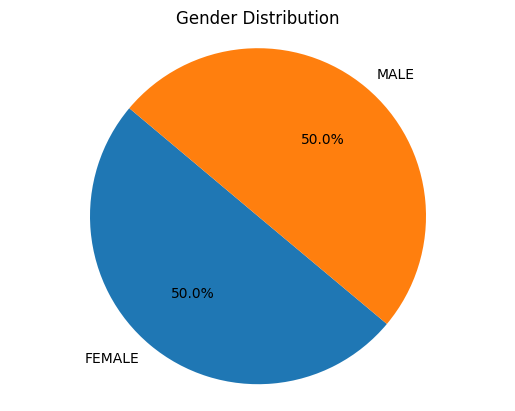

In [ ]:
# Reload and clean data
df = pd.read_csv('patient_data.csv')
df.rename(columns={'C': 'Gender'}, inplace=True)

# Clean 'Gender' entries
df['Gender'] = df['Gender'].str.strip().str.replace('\xa0', '', regex=True).str.upper()

# Now count and plot
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


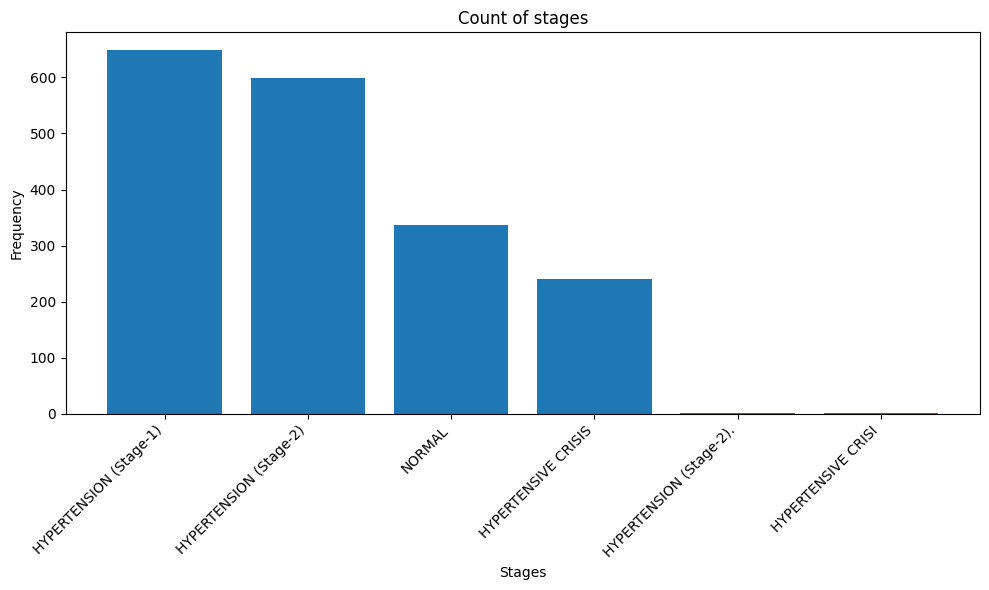

In [ ]:
frequency = df['Stages'].value_counts()

# Widen the figure to avoid label collisions
plt.figure(figsize=(10,6))

# Create bar chart
plt.bar(frequency.index, frequency.values)

# Rotate x-labels for clarity
plt.xticks(rotation=45, ha='right')  # ha = horizontal alignment

# Add labels and title
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.title('Count of stages')
plt.tight_layout()  # Prevents cutoff
plt.show()


# M2A4

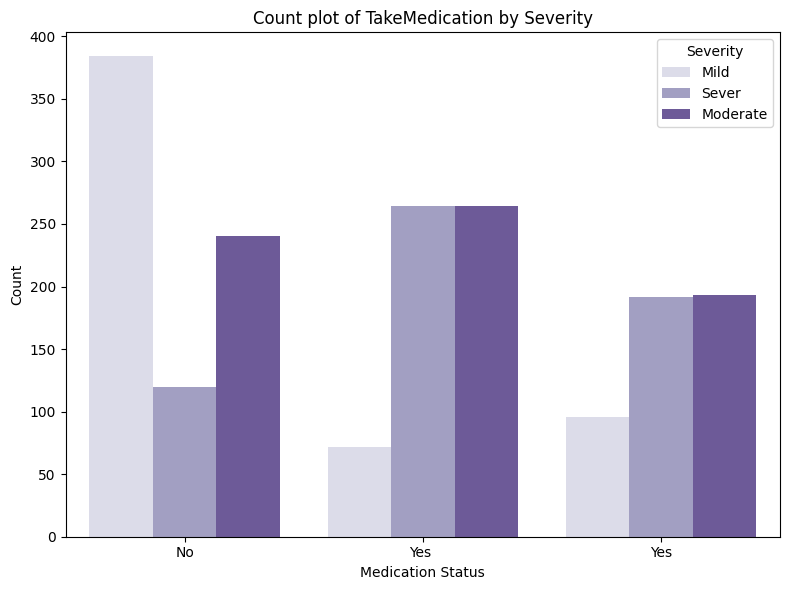

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='TakeMedication', hue='Severity', data=df, palette='Purples')

plt.title('Count plot of TakeMedication by Severity')
plt.xlabel('Medication Status')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

# M2A5

Cleaned DataFrame shape: (1825, 3)


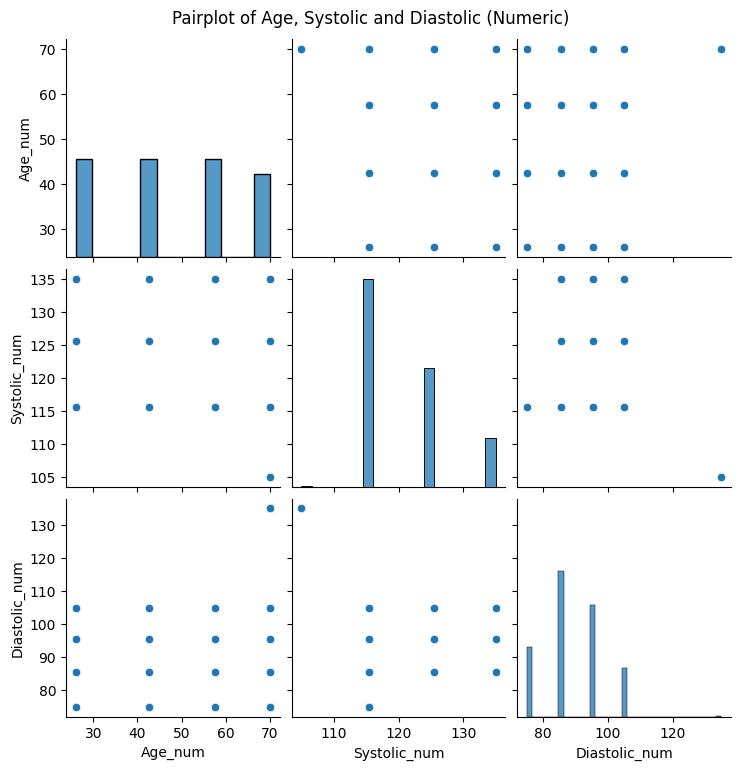

In [ ]:
# Step 1: Load your dataset
df = pd.read_csv('patient_data.csv')

# ✅ Step 2: Clean and convert the range strings into numbers
import re

def clean_text(val):
    val = str(val)
    val = val.encode('ascii', 'ignore').decode()  # remove hidden unicode
    val = re.sub(r'\s+', '', val)                # remove all whitespace
    val = val.strip()                            # trim edges
    return val

def parse_range(val):
    val = clean_text(val)
    if '-' in val:
        parts = val.split('-')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
    elif '+' in val:
        base = float(val.replace('+', ''))
        return base + 5  # Estimated midpoint
    try:
        return float(val)
    except:
        return None

# Step 3: Apply parsing to numeric columns
df['Age_num'] = df['Age'].apply(parse_range)
df['Systolic_num'] = df['Systolic'].apply(parse_range)
df['Diastolic_num'] = df['Diastolic'].apply(parse_range)

# Step 4: Drop invalid rows and visualize
numeric_df = df[['Age_num', 'Systolic_num', 'Diastolic_num']].dropna()
print("Cleaned DataFrame shape:", numeric_df.shape)

if not numeric_df.empty:
    sns.pairplot(numeric_df, diag_kind='hist')
    plt.suptitle('Pairplot of Age, Systolic and Diastolic (Numeric)', y=1.02)
    plt.show()
else:
    print("⚠️ Still no usable data after parsing.")


In [ ]:
# ─── Data Load & One-Shot Cleaning for Model Training ───

import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

# 1) Load raw data exactly once
raw_df = pd.read_csv('patient_data.csv', dtype=str)
df = raw_df.copy()

# 2) Rename C → Gender
df.rename(columns={'C': 'Gender'}, inplace=True)

# 3) Utility to strip whitespace & hidden unicode
def clean_text(val):
    v = str(val)
    v = v.encode('ascii', 'ignore').decode()      # drop non-ASCII
    v = re.sub(r'\s+', '', v)                     # remove all whitespace
    return v.strip()

# 4) Parse binned ranges into numeric midpoints
def parse_range(val):
    v = clean_text(val)
    if '-' in v and v.count('-') == 1:
        low, high = v.split('-')
        return (float(low) + float(high)) / 2
    if '+' in v:
        base = float(v.replace('+',''))
        return base + 5   # estimated midpoint
    try:
        return float(v)
    except:
        return np.nan

for col in ['Age', 'Systolic', 'Diastolic']:
    df[col + '_num'] = df[col].apply(parse_range)

# 5) Parse your diagnosis date (if needed)
df['Whendiagnoused'] = pd.to_datetime(df['Whendiagnoused'], errors='coerce')

# 6) Label-encode all remaining categoricals
cat_cols = [
    'Gender', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges',
    'NoseBleeding', 'ControlledDiet', 'Stages'
]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 7) Drop any rows missing our newly numeric columns
df_clean = df.dropna(subset=['Age_num', 'Systolic_num', 'Diastolic_num']).reset_index(drop=True)

# df_clean is now your one-and-done DataFrame for modeling
print("Clean data ready:", df_clean.shape)


Clean data ready: (1825, 17)


/tmp/ipython-input-41-3879683901.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Whendiagnoused'] = pd.to_datetime(df['Whendiagnoused'], errors='coerce')


# M3A2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define features and target
features = [
    'Age_num', 'Systolic_num', 'Diastolic_num',
    'Gender', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges',
    'NoseBleeding', 'ControlledDiet'
]

target = 'Stages'  # Already label encoded

X = df_clean[features]
y = df_clean[target]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Initialize and train model
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

print("✅ Accuracy Score:", acc_lr)
print("✅ Classification Report:\n", c_lr)


✅ Accuracy Score: 1.0
✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



# M3A3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
features = [
    'Age_num', 'Systolic_num', 'Diastolic_num',
    'Gender', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges',
    'NoseBleeding', 'ControlledDiet'
]
target = 'Stages'  # Already label encoded

X = df_clean[features]
y = df_clean[target]

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize and train model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print("🌳 Random Forest Accuracy:", acc_rf)
print("🌳 Classification Report:\n", c_rf)


🌳 Random Forest Accuracy: 1.0
🌳 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



# M3A4

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Define features and target
features = [
    'Age_num', 'Systolic_num', 'Diastolic_num',
    'Gender', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges',
    'NoseBleeding', 'ControlledDiet'
]
target = 'Stages'

X = df_clean[features]
y = df_clean[target]

# Step 2: Standardize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize and train Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

print("🌲 Decision Tree Accuracy:", acc_dt)
print("🌲 Classification Report:\n", c_dt)


🌲 Decision Tree Accuracy: 0.9972602739726028
🌲 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           3       0.00      0.00      0.00         0
           4       1.00      0.98      0.99        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       0.80      0.80      0.80       365
weighted avg       1.00      1.00      1.00       365



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# M3A5

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
features = [
    'Age_num', 'Systolic_num', 'Diastolic_num',
    'Gender', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges',
    'NoseBleeding', 'ControlledDiet'
]
target = 'Stages'

X = df_clean[features]
y = df_clean[target]

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Train Gaussian Naive Bayes model
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model_gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred)
c_gnb = classification_report(y_test, y_pred)

print("🧠 GaussianNB Accuracy:", acc_gnb)
print("🧠 Classification Report:\n", c_gnb)


🧠 GaussianNB Accuracy: 0.9972602739726028
🧠 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           3       0.00      0.00      0.00         0
           4       1.00      0.98      0.99        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       0.80      0.80      0.80       365
weighted avg       1.00      1.00      1.00       365



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# M3A6

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select features and target
features = [
    'Age_num', 'Systolic_num', 'Diastolic_num',
    'Gender', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges',
    'NoseBleeding', 'ControlledDiet'
]
target = 'Stages'

X = df_clean[features]
y = df_clean[target]

# 🔄 Step 2: Scale features to non-negative range using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🌟 Step 4: Initialize and train MultinomialNB
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

# 📈 Step 5: Predict and evaluate
y_pred = model_mnb.predict(X_test)

acc_mnb = accuracy_score(y_test, y_pred)
c_mnb = classification_report(y_test, y_pred, zero_division=0)

print("📦 MultinomialNB Accuracy:", acc_mnb)
print("📦 Classification Report:\n", c_mnb)


📦 MultinomialNB Accuracy: 0.7917808219178082
📦 Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       139
           1       0.72      1.00      0.84       120
           4       0.00      0.00      0.00        46
           5       1.00      0.50      0.67        60

    accuracy                           0.79       365
   macro avg       0.64      0.62      0.60       365
weighted avg       0.72      0.79      0.73       365



# M3A7

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# --- ASSUMPTIONS:
# 1) df_clean is your fully preprocessed DataFrame
# 2) model_rf is your trained RandomForestClassifier
# 3) label_encoder is the LabelEncoder you used on df_clean['Stages']

# Step 1: Define the feature order
feature_cols = [
    'Age_num', 'Systolic_num', 'Diastolic_num',
    'Gender', 'History', 'Patient', 'TakeMedication',
    'Severity', 'BreathShortness', 'VisualChanges',
    'NoseBleeding', 'ControlledDiet'
]

# Step 2: Re-fit your scaler on the entire training set
scaler = StandardScaler()
scaler.fit(df_clean[feature_cols])

# Step 3: Build your “new patient” record
# Replace these values with whatever you want to test:
# [Age_num, Systolic_num, Diastolic_num, Gender, History, Patient,
#  TakeMedication, Severity, BreathShortness, VisualChanges,
#  NoseBleeding, ControlledDiet]
new_record = np.array([[
    45,     # Age_num
    130,    # Systolic_num
    85,     # Diastolic_num
    1,      # Gender (e.g. 0=F, 1=M)
    0,      # History
    1,      # Patient
    0,      # TakeMedication
    2,      # Severity
    0,      # BreathShortness
    0,      # VisualChanges
    0,      # NoseBleeding
    1       # ControlledDiet
]])

# Step 4: Scale and predict
new_scaled = scaler.transform(new_record)
pred_code = model_rf.predict(new_scaled)[0]

# Step 5: Decode back to the original stage label
pred_label = label_encoder.inverse_transform([pred_code])[0]

print(f"Predicted numeric stage code: {pred_code}")
print(f"Predicted stage label: {pred_label}")


Predicted numeric stage code: 1
Predicted stage label: HYPERTENSION (Stage-2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# M4A1

In [ ]:
# ─── Milestone 4: Performance Testing & Model Comparison ───

import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# 1) Gather your trained models into a dict
models = {
    "Logistic Regression":    model_lr,
    "Decision Tree":          model_dt,
    "Random Forest":          model_rf,
    "Gaussian Naive Bayes":   model_gnb,
    "Multinomial Naive Bayes": model_mnb
}

# 2) Evaluate each model on the same test set
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)

    # compute accuracy
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

    # print the full classification report
    print(f"--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("\n" + "-"*60 + "\n")

# 3) Build a DataFrame to compare accuracies
performance_df = pd.DataFrame(results).sort_values(
    by="Accuracy", ascending=False
).reset_index(drop=True)

print("Model Accuracy Comparison:\n")
print(performance_df)


--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.00      0.00      0.00       120
           4       0.00      0.00      0.00        46
           5       0.16      1.00      0.28        60

    accuracy                           0.16       365
   macro avg       0.04      0.25      0.07       365
weighted avg       0.03      0.16      0.05       365


------------------------------------------------------------

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       139
           1       1.00      1.00      1.00       120
           3       0.00      0.00      0.00         0
           4       1.00      0.96      0.98        46
           5       0.00      0.00      0.00        60

    accuracy                           0.83       365
   macro avg       0.54     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# M5A1

In [ ]:
# ─── Save Random Forest Model Using Pickle ───

import pickle

# Customize the filename and protocol as needed
filename = 'best_random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_rf, file)

print(f"✅ Model saved successfully as '{filename}' using pickle.")


✅ Model saved successfully as 'best_random_forest_model.pkl' using pickle.


In [ ]:
# ─── Download the Saved Pickle File ───

from google.colab import files

files.download('best_random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>